# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url = api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units=imperial
base_url = 'http://api.openweathermap.org/data/2.5/weather?&appid='+weather_api_key+'&units=imperial&q=' 

# use variable to track count of cities 
cityCount = 1

# use variables to store values from api
lat_list = []
lon_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []
country_list = []
date_list = []
city_list = []


print(f'Begin Data Retrevial')
print(f'------------------')

# for each city in the list attempt to get weather data
for city in cities:
    
    # attempt to get response data from open weather map api
    try:
        
        print(f'Processing Record {cityCount} | {city}')
        cityCount += 1
        url = base_url+city
        response = requests.get(url).json()

        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        #store data
        lat_list.append(lat)
        lon_list.append(lon)
        temp_list.append(temp)
        humidity_list.append(humidity)
        clouds_list.append(clouds)
        wind_list.append(wind)
        country_list.append(country)
        date_list.append(date)
        city_list.append(city)
    
    # skip city if response fails
    except:
        print(f'{city} not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begin Data Retrevial
------------------
Processing Record 1 | georgetown
Processing Record 2 | albany
Processing Record 3 | concordia
Processing Record 4 | sur
Processing Record 5 | ushuaia
Processing Record 6 | port elizabeth
Processing Record 7 | ribeira grande
Processing Record 8 | nikolskoye
Processing Record 9 | burica
burica not found. Skipping...
Processing Record 10 | ilulissat
Processing Record 11 | bluff
Processing Record 12 | worcester
Processing Record 13 | hobart
Processing Record 14 | avarua
Processing Record 15 | teya
Processing Record 16 | naze
Processing Record 17 | kodinsk
Processing Record 18 | jamestown
Processing Record 19 | hamilton
Processing Record 20 | te anau
Processing Record 21 | douai
Processing Record 22 | ahumada
ahumada not found. Skipping...
Processing Record 23 | vaini
Processing Record 24 | fortuna
Processing Record 25 | belushya guba
belushya guba not found. Skipping...
Processing Record 26 | rikitea
Processing Record 27 | hami
Processing Record 28 |

Processing Record 234 | talnakh
Processing Record 235 | hervey bay
Processing Record 236 | leningradskiy
Processing Record 237 | saint-leu
Processing Record 238 | bembereke
Processing Record 239 | goderich
Processing Record 240 | turayf
Processing Record 241 | sambava
Processing Record 242 | najran
Processing Record 243 | tiksi
Processing Record 244 | yevsino
Processing Record 245 | stornoway
Processing Record 246 | longjiang
Processing Record 247 | ranong
Processing Record 248 | halalo
halalo not found. Skipping...
Processing Record 249 | nogliki
Processing Record 250 | beringovskiy
Processing Record 251 | tumannyy
tumannyy not found. Skipping...
Processing Record 252 | maputo
Processing Record 253 | nanortalik
Processing Record 254 | iqaluit
Processing Record 255 | vozhd proletariata
vozhd proletariata not found. Skipping...
Processing Record 256 | dingle
Processing Record 257 | ryotsu
Processing Record 258 | tabory
Processing Record 259 | padang
Processing Record 260 | kaitangata
Pr

Processing Record 460 | rio grande
Processing Record 461 | pierre
Processing Record 462 | gat
Processing Record 463 | trincomalee
Processing Record 464 | sompeta
Processing Record 465 | sao borja
Processing Record 466 | ust-ilimsk
Processing Record 467 | miranda de ebro
Processing Record 468 | krasnoselkup
Processing Record 469 | fairbanks
Processing Record 470 | grand river south east
grand river south east not found. Skipping...
Processing Record 471 | yashkul
Processing Record 472 | villamontes
Processing Record 473 | devils lake
Processing Record 474 | hay river
Processing Record 475 | tokur
Processing Record 476 | bubaque
Processing Record 477 | galle
Processing Record 478 | skagastrond
skagastrond not found. Skipping...
Processing Record 479 | marsa matruh
Processing Record 480 | pimentel
Processing Record 481 | yarkovo
Processing Record 482 | bernal
Processing Record 483 | vao
Processing Record 484 | artyom
Processing Record 485 | rocha
Processing Record 486 | beyla
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({'City': city_list,
                        'Lat': lat_list,
                        'Lng': lon_list,
                        'Max Temp': temp_list,
                        'Humidity': humidity_list,
                        'Cloudiness': clouds_list,
                        'Wind Speed': wind_list,
                        'Country': country_list,
                        'Date': date_list
                       })

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,87.80,66,20,5.82,MY,1604988983
1,albany,42.60,-73.97,46.99,100,1,2.30,US,1604989100
2,concordia,-31.39,-58.02,62.01,90,29,1.99,AR,1604988984
3,sur,22.57,59.53,82.83,54,0,6.33,OM,1604989100
4,ushuaia,-54.80,-68.30,42.80,75,40,32.21,AR,1604989100


In [5]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.368574,18.329691,57.536804,73.609966,48.407216,8.401546,1.604989e+09
std,33.247289,89.827490,24.027962,21.397334,39.096123,5.827580,6.779503e+01
min,-54.800000,-179.170000,-21.280000,1.000000,0.000000,0.290000,1.604989e+09
25%,-6.887500,-58.717500,41.147500,63.000000,2.250000,3.697500,1.604989e+09
50%,24.325000,24.700000,62.620000,79.000000,41.000000,6.930000,1.604989e+09
75%,49.522500,96.932500,77.000000,90.000000,90.000000,11.520000,1.604989e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,32.210000,1.604989e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
bad_data = city_df.loc[city_df['Humidity'] > 100].index

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(bad_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,87.80,66,20,5.82,MY,1604988983
1,albany,42.60,-73.97,46.99,100,1,2.30,US,1604989100
2,concordia,-31.39,-58.02,62.01,90,29,1.99,AR,1604988984
3,sur,22.57,59.53,82.83,54,0,6.33,OM,1604989100
4,ushuaia,-54.80,-68.30,42.80,75,40,32.21,AR,1604989100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

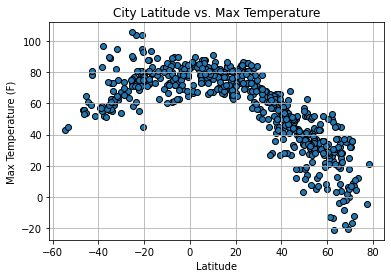

In [8]:
# latitude vs. temperature scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Max Temp'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/latVStemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

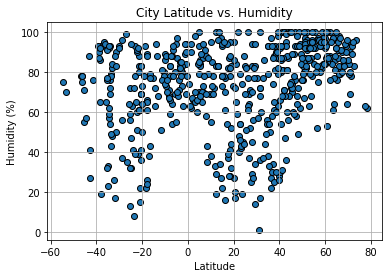

In [9]:
# latitude vs. humidity scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Humidity'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

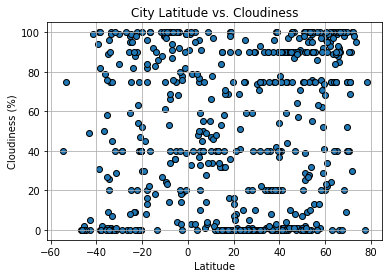

In [10]:
# latitude vs. cloudiness scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

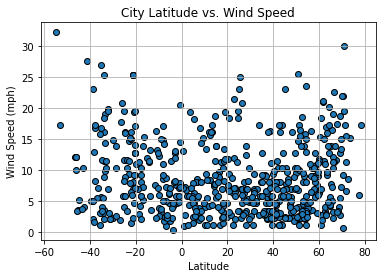

In [11]:
# latitude vs. wind speed scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_windSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [12]:
# linear regression calculation & plot function
def lin_regress(x_values, y_values, ylabel, text_coordinates):
    
    # calculate regression value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # create scatter plot
    plt.scatter(x_values,y_values)
    
    # create regession line & display equation
    plt.plot(x_values,regression_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # add axis & plot titles
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    
    # print r value
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [13]:
north_hem = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
south_hem = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7593297783140813


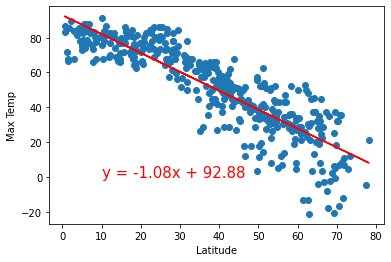

In [14]:
lin_regress(north_hem['Lat'], north_hem['Max Temp'], 'Max Temp', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.22652168178432197


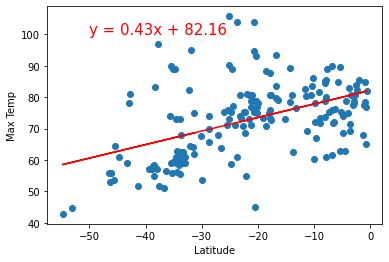

In [15]:
lin_regress(south_hem['Lat'], south_hem['Max Temp'], 'Max Temp', (-50,100))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12463301167535737


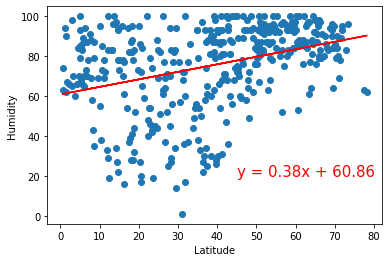

In [16]:
lin_regress(north_hem['Lat'], north_hem['Humidity'], 'Humidity', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.026962673609173402


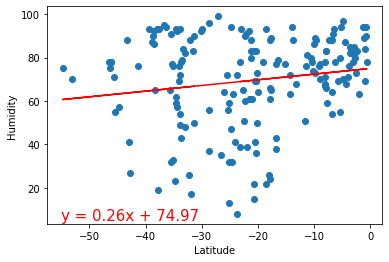

In [17]:
lin_regress(south_hem['Lat'], south_hem['Humidity'], 'Humidity', (-55,5))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08696015150674163


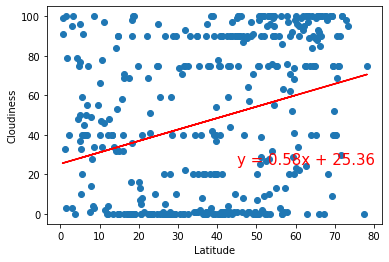

In [18]:
lin_regress(north_hem['Lat'], north_hem['Cloudiness'], 'Cloudiness', (45,25))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08862089140261077


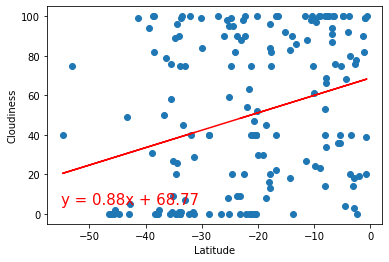

In [19]:
lin_regress(south_hem['Lat'], south_hem['Cloudiness'], 'Cloudiness', (-55,5))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0293597690976962


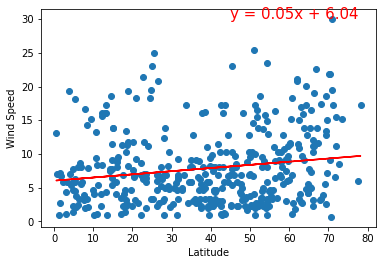

In [20]:
lin_regress(north_hem['Lat'], north_hem['Wind Speed'], 'Wind Speed', (45,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.039763622170808234


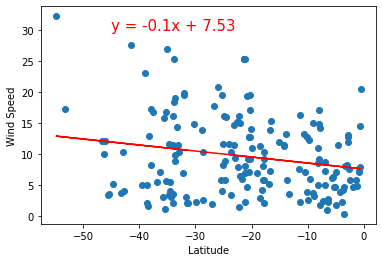

In [21]:
lin_regress(south_hem['Lat'], south_hem['Wind Speed'], 'Wind Speed', (-45,30))